# Evaluating LoFTR Robustness

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns
import math

df_full = pd.read_csv("robustness_results2.csv")
df_full.head()

fixed_image  moving_image background size transform  magnitude  \
0            1            13   Original  1/4       NaN        NaN   
1            1            13   Original  1/8       NaN        NaN   
2            1            13     Eroded  1/4  Rotation      -30.0   
3            1            13     Eroded  1/4  Rotation      -20.0   
4            1            13     Eroded  1/4  Rotation      -10.0   

   total_matches  conf_matches  inliers       mse      ssim       ncc  \
0           5935          2904    945.0  0.048013  0.644023  0.522397   
1           1352           562    200.0  0.040613  0.664256  0.570236   
2            146            16     18.0  0.007665  0.894674  0.606517   
3            274            70     55.0  0.001634  0.932398  0.939886   
4            485           167     86.0  0.001892  0.930690  0.925629   

         mi  
0  0.539207  
1  0.672276  
2  0.112704  
3  0.262729  
4  0.250247

## Eroded Background

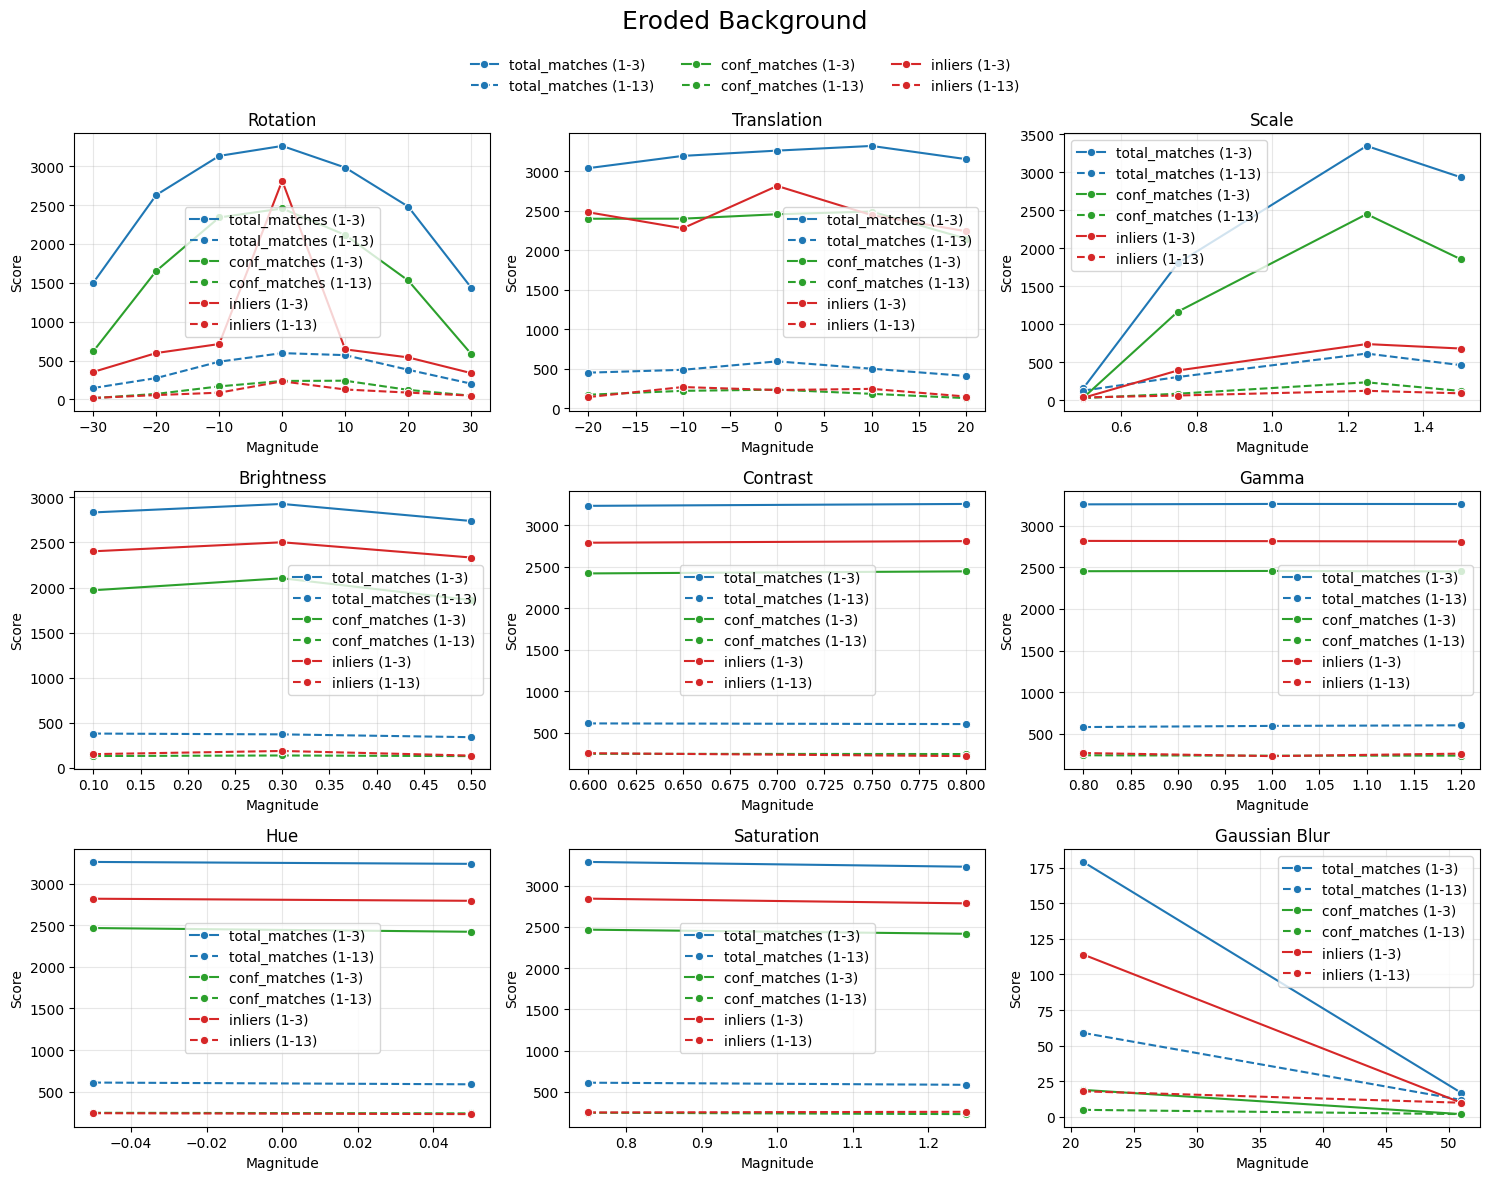

In [13]:
# Convert magnitude to numeric
df_full["magnitude"] = pd.to_numeric(df_full["magnitude"], errors="coerce")

# Filter to size = "1/8"
df = df_full[(df_full["size"] == "1/4") & (df_full["background"] == "Eroded") & (df_full["transform"] != "Gaussian Noise")]

# Metrics you want to plot in each subplot
metrics = ["total_matches", "conf_matches", "inliers"]

# Consistent colors for metrics
palette = {
    "total_matches": "#1f77b4",  # blue
    "conf_matches": "#2ca02c",   # green
    "inliers": "#d62728",        # red
}

# Line styles for the two image pairs
pair_styles = {
    (1, 3): "-",
    (1, 13): "--",
}

transforms = df["transform"].unique()
n = len(transforms)

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharey=False)
axes = axes.flatten()

for ax, t in zip(axes, transforms):

    sub = df[df["transform"] == t]

    # Plot curves for each metric & image pair
    for metric in metrics:
        for (f, m), ls in pair_styles.items():

            pair_df = sub[
                (sub["fixed_image"] == f) &
                (sub["moving_image"] == m)
            ].sort_values("magnitude")

            if len(pair_df) > 0:
                sns.lineplot(
                    data=pair_df,
                    x="magnitude",
                    y=metric,
                    label=f"{metric} ({f}-{m})",
                    ax=ax,
                    marker="o",
                    linestyle=ls,
                    color=palette[metric]
                )

    ax.set_title(t)
    ax.set_xlabel("Magnitude")
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.3)

# Hide unused axes
for ax in axes[len(transforms):]:
    ax.set_visible(False)

# Build a combined legend with unique entries
handles, labels = [], []
for ax in axes[:len(transforms)]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate legend entries
uniq = dict(zip(labels, handles))

fig.suptitle("Eroded Background", fontsize=18)
fig.legend(
    uniq.values(),
    uniq.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=3,
    frameon=False,
)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

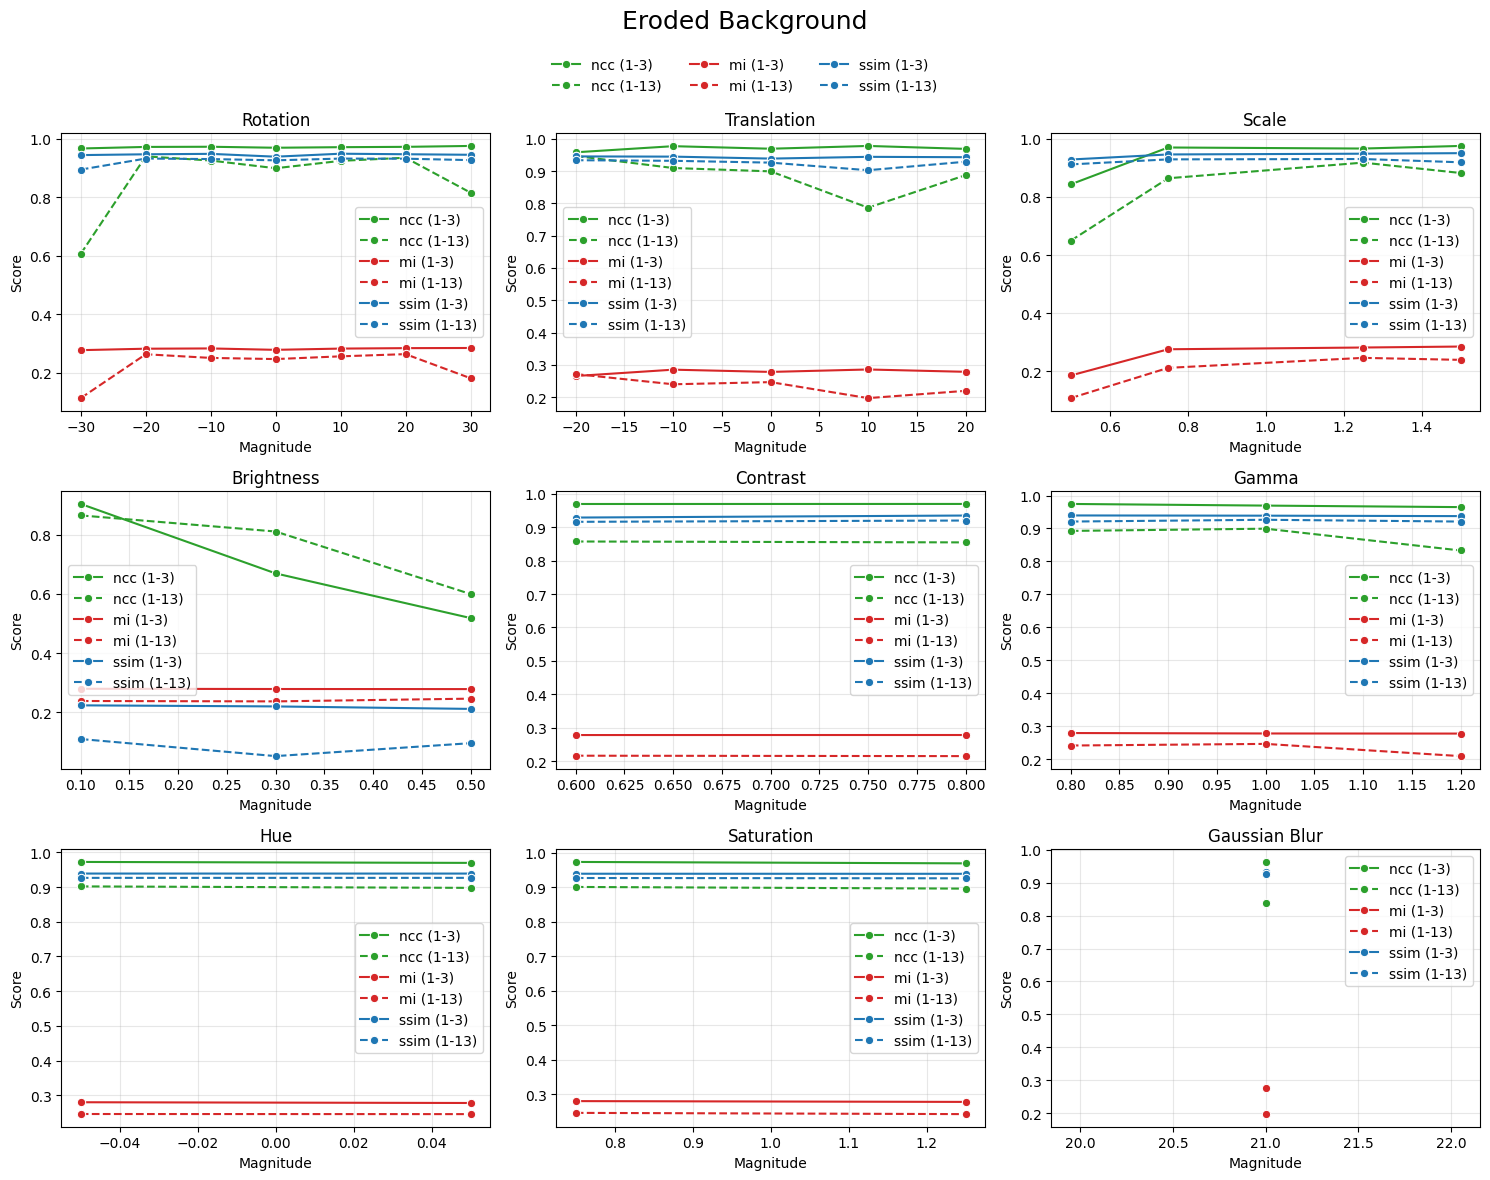

In [2]:
# Filter to size = "1/8"
df = df_full[(df_full["size"] == "1/4") & (df_full["background"] == "Eroded") & (df_full["transform"] != "Gaussian Noise")]

# Metrics you want to plot in each subplot
metrics = ["ncc", "mi", "ssim"]

# Consistent colors for metrics
palette = {
    "ssim": "#1f77b4",  # blue
    "ncc": "#2ca02c",   # green
    "mi": "#d62728",        # red
    "mse": "#800080",
}

# Line styles for the two image pairs
pair_styles = {
    (1, 3): "-",
    (1, 13): "--",
}

transforms = df["transform"].unique()
n = len(transforms)

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharey=False)
axes = axes.flatten()

for ax, t in zip(axes, transforms):

    sub = df[df["transform"] == t]

    # Plot curves for each metric & image pair
    for metric in metrics:
        for (f, m), ls in pair_styles.items():

            pair_df = sub[
                (sub["fixed_image"] == f) &
                (sub["moving_image"] == m)
            ].sort_values("magnitude")

            if len(pair_df) > 0:
                sns.lineplot(
                    data=pair_df,
                    x="magnitude",
                    y=metric,
                    label=f"{metric} ({f}-{m})",
                    ax=ax,
                    marker="o",
                    linestyle=ls,
                    color=palette[metric]
                )

    ax.set_title(t)
    ax.set_xlabel("Magnitude")
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.3)

# Hide unused axes
for ax in axes[len(transforms):]:
    ax.set_visible(False)

# Build a combined legend with unique entries
handles, labels = [], []
for ax in axes[:len(transforms)]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate legend entries
uniq = dict(zip(labels, handles))

fig.suptitle("Eroded Background", fontsize=18)
fig.legend(
    uniq.values(),
    uniq.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=3,
    frameon=False,
)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## Eroded + Cropped Background

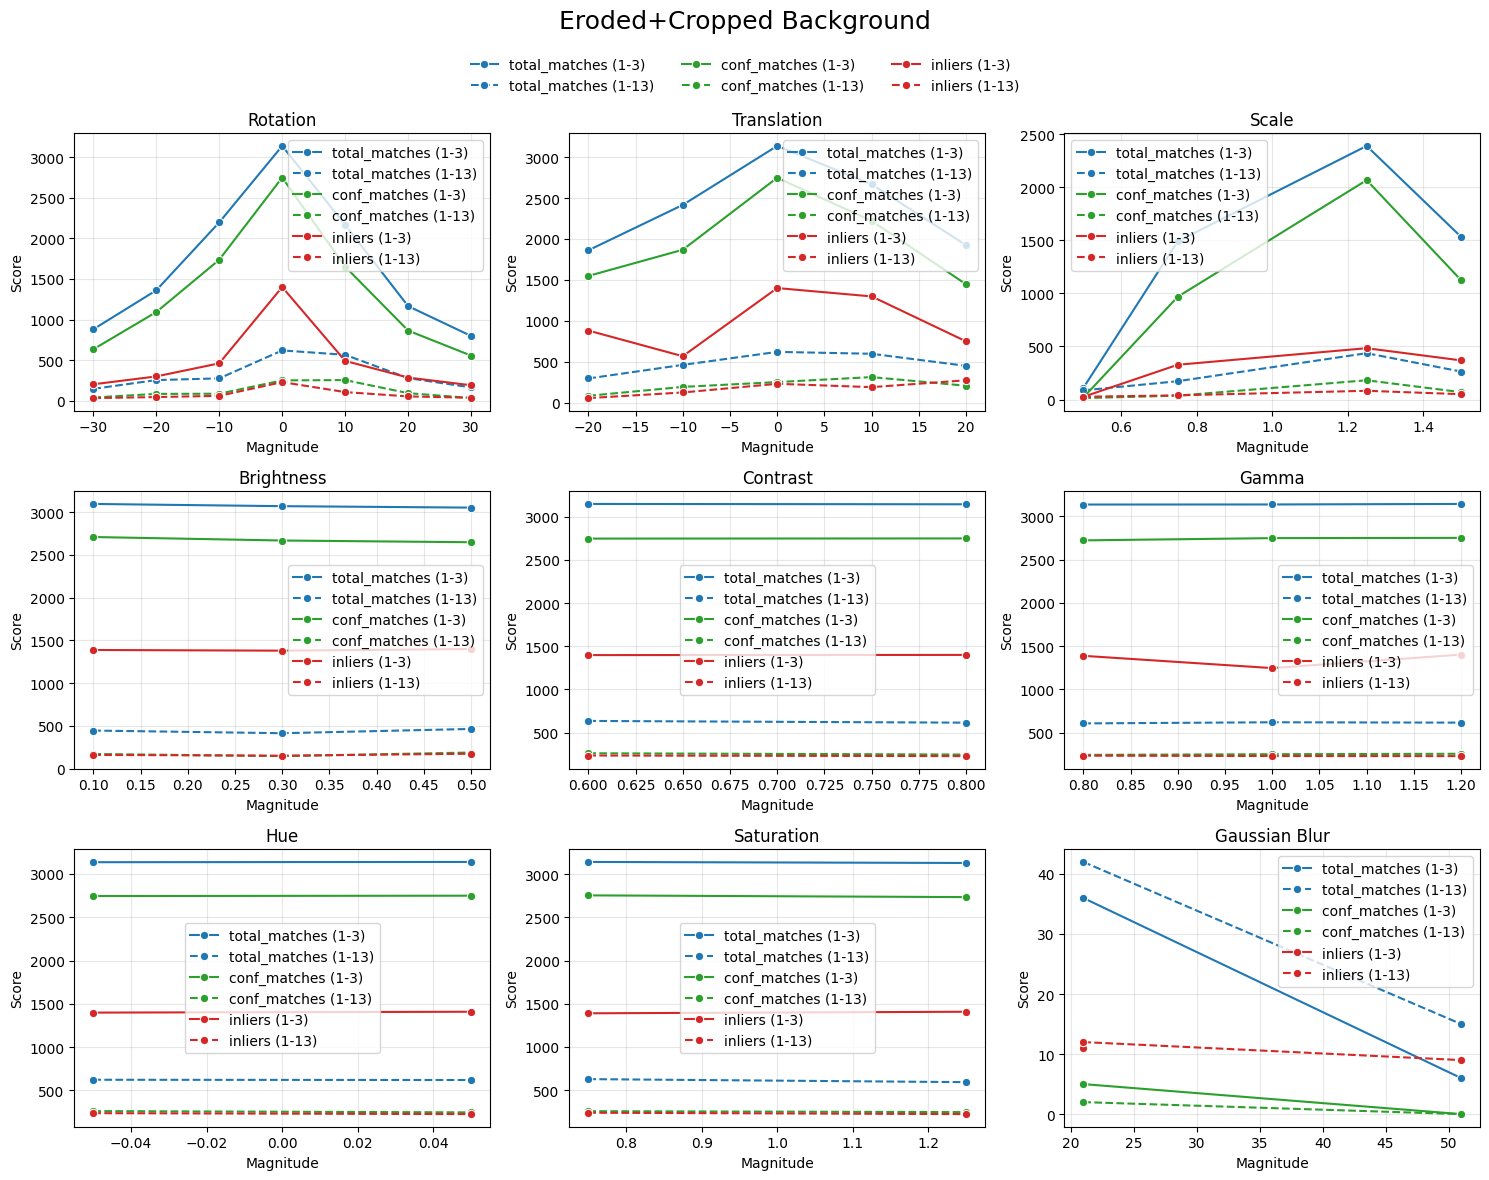

In [14]:
# Convert magnitude to numeric
df_full["magnitude"] = pd.to_numeric(df_full["magnitude"], errors="coerce")

# Filter to size = "1/8"
df = df_full[(df_full["size"] == "1/4") & (df_full["background"] == "Eroded+Cropped") & (df_full["transform"] != "Gaussian Noise")]

# Metrics you want to plot in each subplot
metrics = ["total_matches", "conf_matches", "inliers"]

# Consistent colors for metrics
palette = {
    "total_matches": "#1f77b4",  # blue
    "conf_matches": "#2ca02c",   # green
    "inliers": "#d62728",        # red
}

# Line styles for the two image pairs
pair_styles = {
    (1, 3): "-",
    (1, 13): "--",
}

transforms = df["transform"].unique()
n = len(transforms)

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharey=False)
axes = axes.flatten()

for ax, t in zip(axes, transforms):

    sub = df[df["transform"] == t]

    # Plot curves for each metric & image pair
    for metric in metrics:
        for (f, m), ls in pair_styles.items():

            pair_df = sub[
                (sub["fixed_image"] == f) &
                (sub["moving_image"] == m)
            ].sort_values("magnitude")

            if len(pair_df) > 0:
                sns.lineplot(
                    data=pair_df,
                    x="magnitude",
                    y=metric,
                    label=f"{metric} ({f}-{m})",
                    ax=ax,
                    marker="o",
                    linestyle=ls,
                    color=palette[metric]
                )

    ax.set_title(t)
    ax.set_xlabel("Magnitude")
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.3)

# Hide unused axes
for ax in axes[len(transforms):]:
    ax.set_visible(False)

# Build a combined legend with unique entries
handles, labels = [], []
for ax in axes[:len(transforms)]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate legend entries
uniq = dict(zip(labels, handles))

fig.suptitle("Eroded+Cropped Background", fontsize=18)
fig.legend(
    uniq.values(),
    uniq.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=3,
    frameon=False,
)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

### Heatmap of Size Effect

In [4]:
def plot_transform_size_heatmaps(agg_df, metrics, cmap="viridis"):
    n_metrics = len(metrics)
    fig, axes = plt.subplots(
        1, n_metrics,
        figsize=(4 * n_metrics, 0.5 * agg_df["transform"].nunique() + 2),
        sharey=True
    )

    if n_metrics == 1:
        axes = [axes]

    for ax, metric in zip(axes, metrics):
        pivot = agg_df.pivot(
            index="transform",
            columns="size",
            values=metric
        )

        im = ax.imshow(pivot.values, aspect="auto", cmap=cmap)

        ax.set_xticks(range(len(pivot.columns)))
        ax.set_xticklabels(pivot.columns)
        ax.set_yticks(range(len(pivot.index)))
        ax.set_yticklabels(pivot.index)

        ax.set_title(metric)
        ax.set_xlabel("Size")

        fig.colorbar(im, ax=ax, shrink=0.8)

    axes[0].set_ylabel("Transform")
    fig.suptitle(f"Effect of Size (background = {BACKGROUND})", y=1.02)
    plt.tight_layout()
    plt.show()

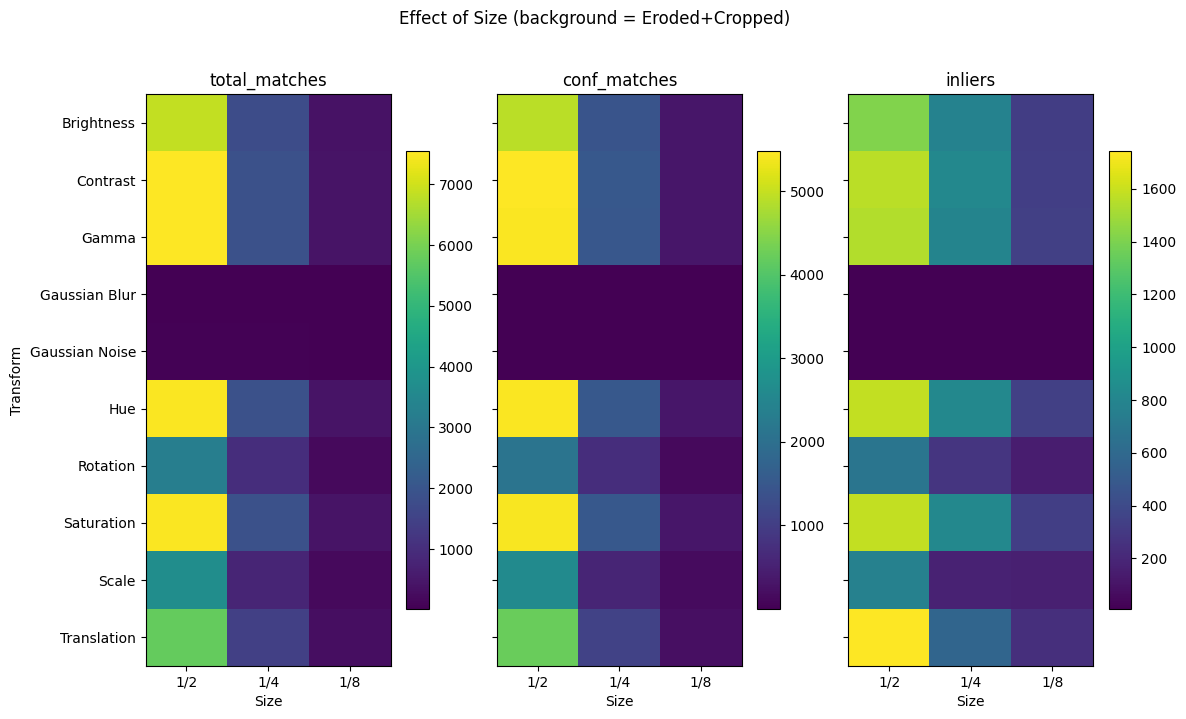

In [5]:
# Load and filter


BACKGROUND = "Eroded+Cropped"   # choose one
df_eroded_cropped = df_full[
    (df_full["background"] == BACKGROUND) #& (df["transform"] != "Gaussian Noise")
]
df_eroded_cropped = df_eroded_cropped.copy()

# Ensure size is ordered (important!)
size_order = ["1/2", "1/4", "1/8"]
df_eroded_cropped["size"] = pd.Categorical(df_eroded_cropped["size"], categories=size_order, ordered=True)

metrics_cat1 = ["total_matches", "conf_matches", "inliers"]
metrics_cat2 = ["ncc", "ssim", "mi"]
# metrics_cat2 = [...]  # if you have another category

# aggregate metrics over transform magnitudes
agg = (
    df_eroded_cropped
    .groupby(["transform", "size"], observed=True)[metrics_cat1]
    .mean()
    .reset_index()
)

plot_transform_size_heatmaps(agg, metrics_cat1)

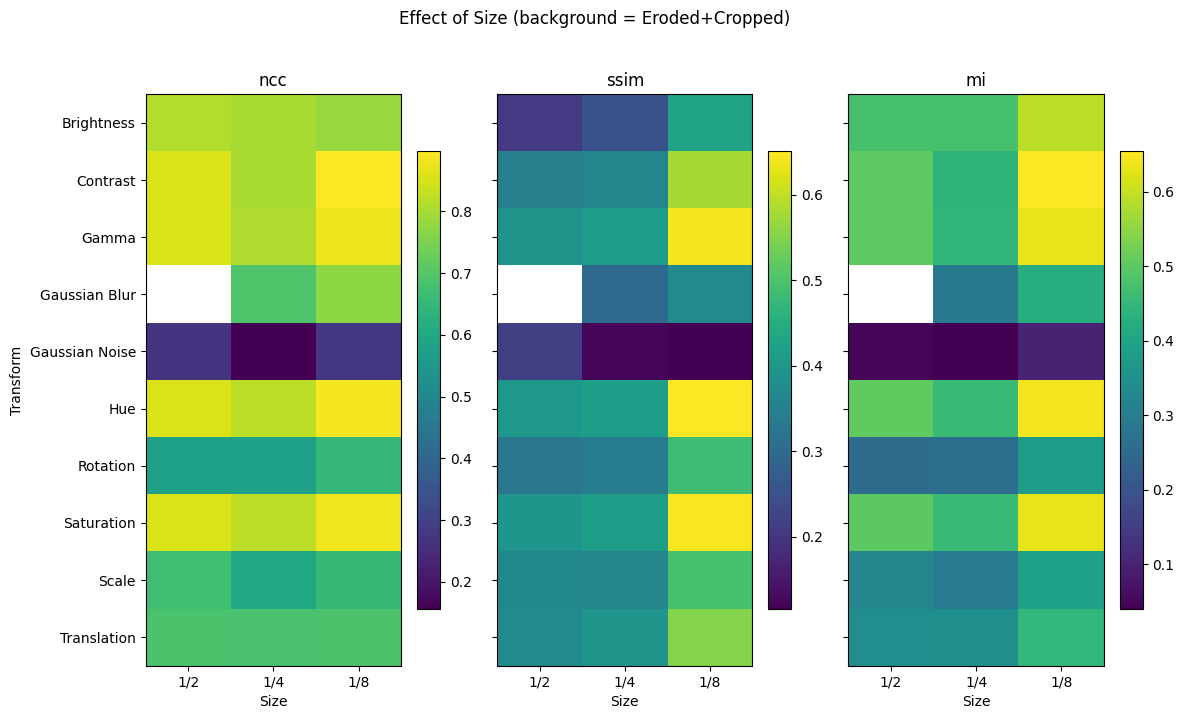

In [10]:
# Load and filter


BACKGROUND = "Eroded+Cropped"   # choose one
df_eroded_cropped = df_full[
    (df_full["background"] == BACKGROUND) #& (df["transform"] != "Gaussian Noise")
]

df_eroded_cropped = df_eroded_cropped.copy()

# Ensure size is ordered (important!)
size_order = ["1/2", "1/4", "1/8"]
df_eroded_cropped["size"] = pd.Categorical(df_eroded_cropped["size"], categories=size_order, ordered=True)

metrics_cat1 = ["total_matches", "conf_matches", "inliers"]
metrics_cat2 = ["ncc", "ssim", "mi"]
# metrics_cat2 = [...]  # if you have another category

# aggregate metrics over transform magnitudes
agg = (
    df_eroded_cropped
    .groupby(["transform", "size"], observed=True)[metrics_cat2]
    .mean()
    .reset_index()
)

plot_transform_size_heatmaps(agg, metrics_cat2)

### Size Effect by transform

In [12]:
def plot_size_effect_per_transform(df, metrics):
    transforms = df["transform"].unique()
    n = len(transforms)

    fig, axes = plt.subplots(
        n, 1,
        figsize=(6, 2.5 * n),
        sharex=True
    )

    if n == 1:
        axes = [axes]

    for ax, t in zip(axes, transforms):
        sub = df[df["transform"] == t]

        agg = (
            sub
            .groupby("size", observed=True)[metrics]
            .mean()
            .reset_index()
        )

        for metric in metrics:
            ax.plot(
                agg["size"],
                agg[metric],
                marker="o",
                label=metric
            )

        ax.set_title(t)
        ax.set_ylabel("Score")
        ax.grid(alpha=0.3)

    axes[-1].set_xlabel("Size")
    axes[0].legend(ncol=len(metrics))
    fig.suptitle(f"Size effect per transform (background = {BACKGROUND})", y=1.02)
    plt.tight_layout()
    plt.show()


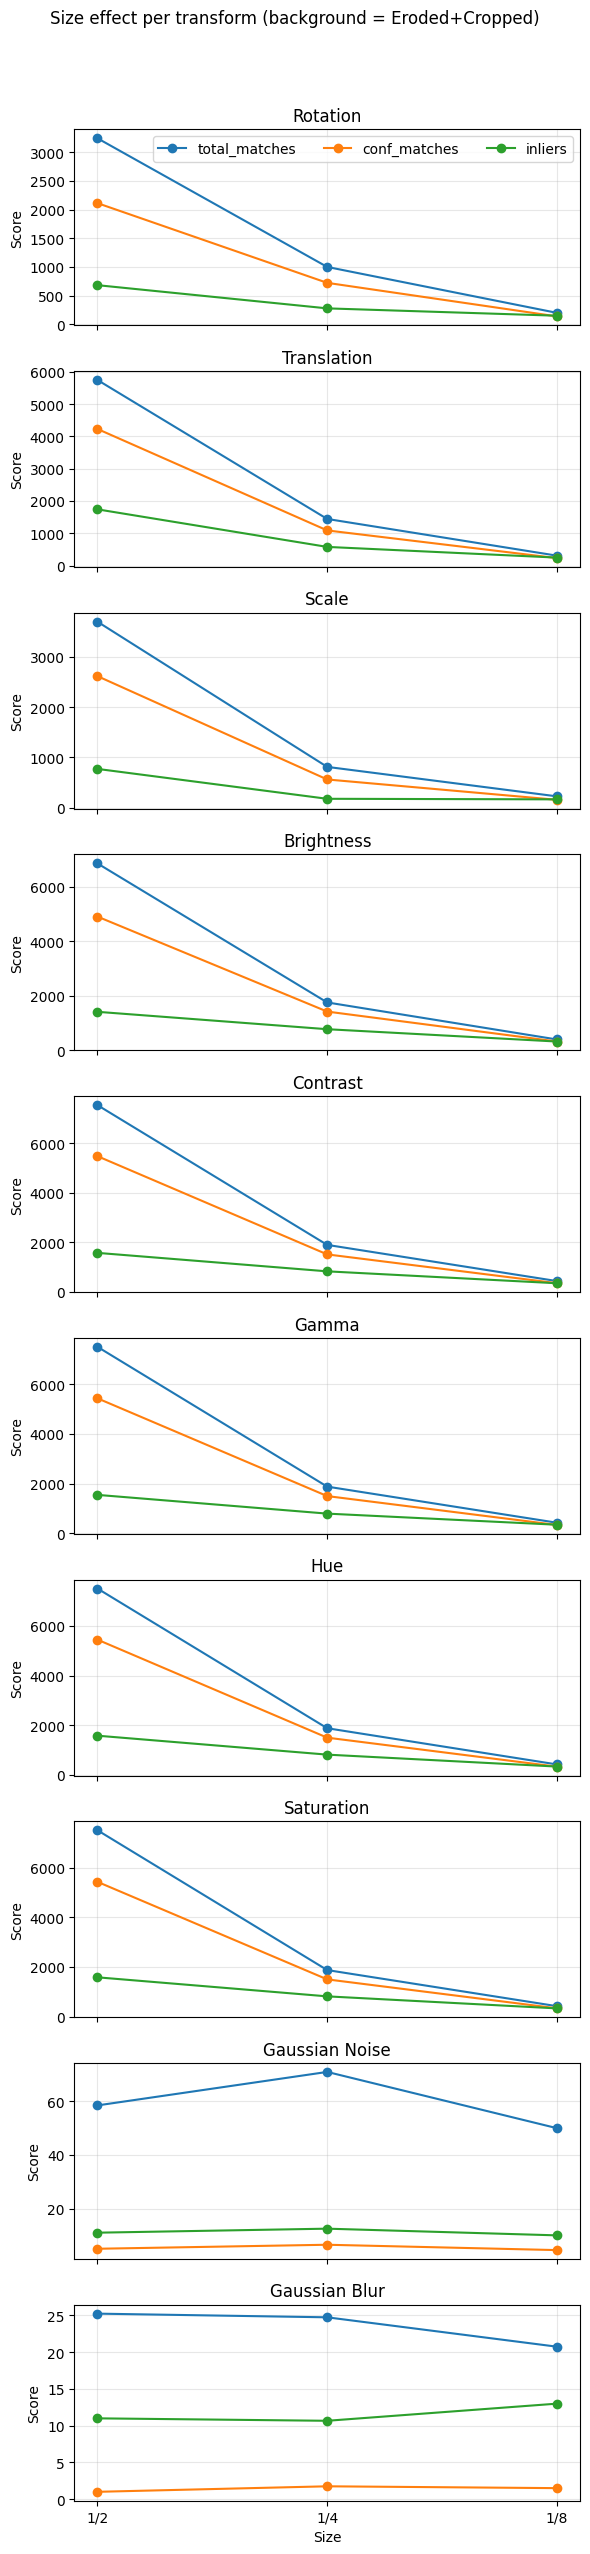

In [13]:
plot_size_effect_per_transform(df_eroded_cropped, metrics_cat1)

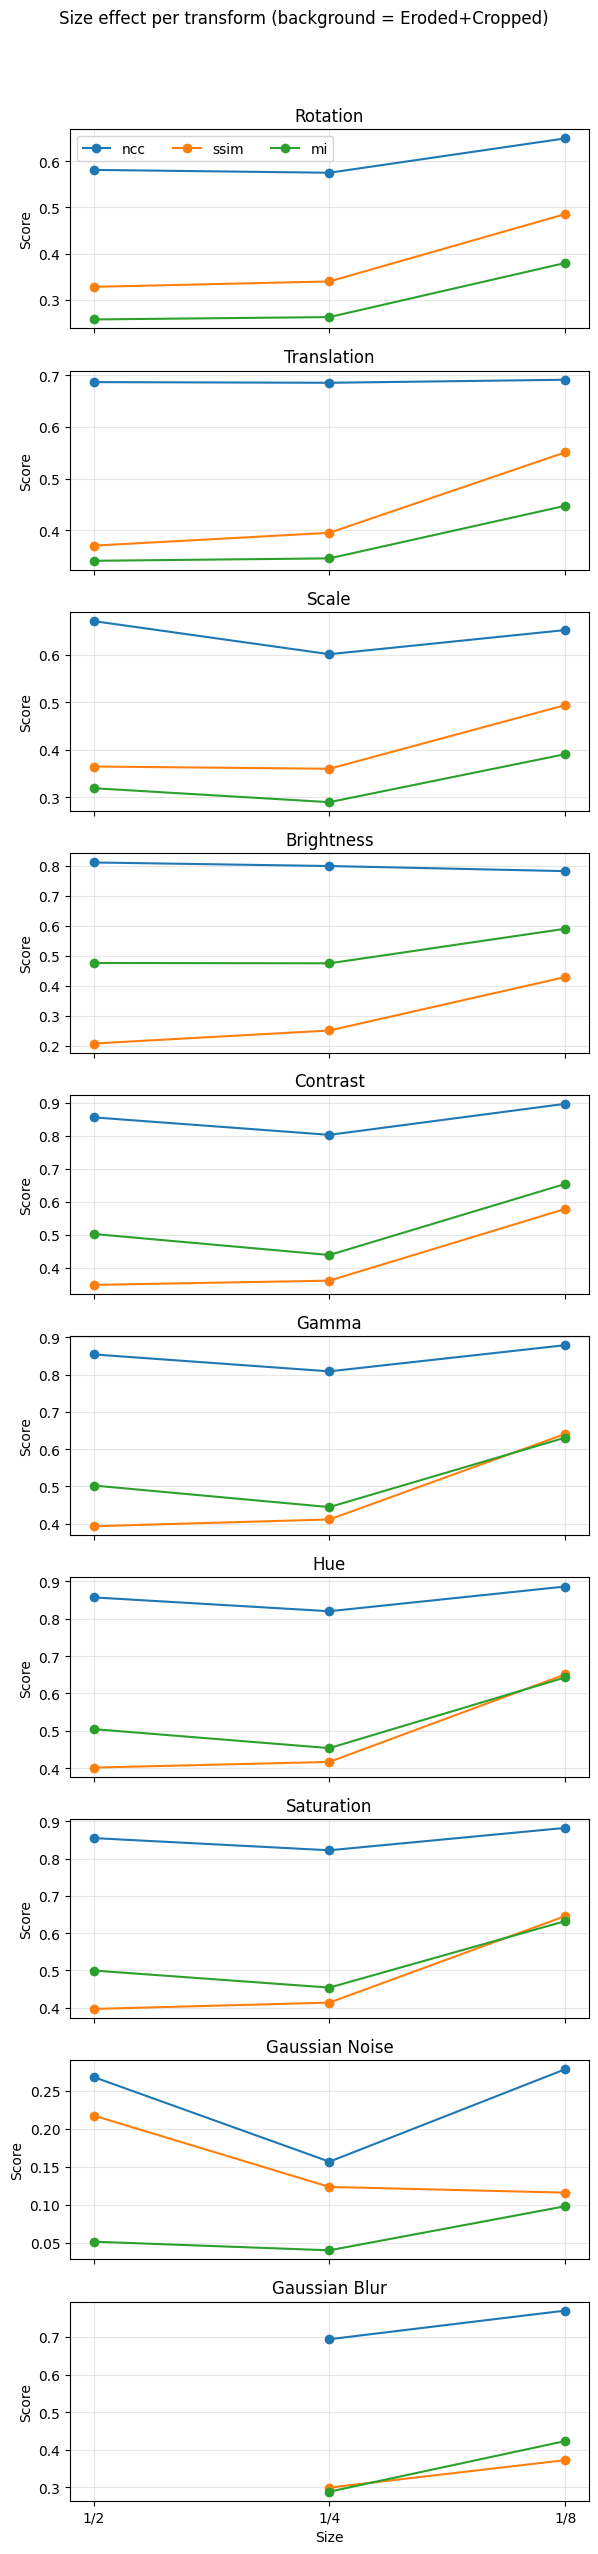

In [14]:
plot_size_effect_per_transform(df_eroded_cropped, metrics_cat2)

#### Not aggregated

In [51]:
def plot_size_vs_metric_by_magnitude_and_pair(df, metrics):
    transforms = df["transform"].drop_duplicates().tolist()
    pairs = {
        (1, 3): "solid",
        (1, 13): "dashed",
    }

    n_rows = len(transforms)
    n_metrics = len(metrics)

    fig = plt.figure(figsize=(4 * n_metrics + 1.2, 2.6 * n_rows))

    gs = gridspec.GridSpec(
        n_rows, n_metrics + 1,   # +1 column for colorbar
        width_ratios=[1] * n_metrics + [0.06],
        wspace=0.25,
        hspace=0.35
    )

    axes = [[None] * n_metrics for _ in range(n_rows)]

    for i, transform in enumerate(transforms):
        df_t = df[df["transform"] == transform]

        mags = sorted(df_t["magnitude"].unique())
        norm = mpl.colors.Normalize(vmin=min(mags), vmax=max(mags))
        cmap = mpl.cm.viridis

        for j, metric in enumerate(metrics):
            ax = fig.add_subplot(gs[i, j])
            axes[i][j] = ax

            for mag in mags:
                for (fixed, moving), linestyle in pairs.items():
                    sub = df_t[
                        (df_t["magnitude"] == mag) &
                        (df_t["fixed_image"] == fixed) &
                        (df_t["moving_image"] == moving)
                    ]

                    if sub.empty:
                        continue

                    ax.plot(
                        sub["size"],
                        sub[metric],
                        linestyle=linestyle,
                        marker="o",
                        color=cmap(norm(mag)),
                        linewidth=1.5,
                        alpha=0.9
                    )

            ax.set_xlabel("Size")
            ax.grid(alpha=0.25)

            if i == 0:
                ax.set_title(metric)

            if j == 0:
                ax.set_ylabel(transform)

        # ---- Colorbar axis for this row (perfectly aligned) ----
        cax = fig.add_subplot(gs[i, -1])
        sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        cbar = fig.colorbar(sm, cax=cax)
        cbar.set_label("Magnitude")

    # ---- Line style legend ----
    line_legend = [
        mpl.lines.Line2D([0], [0], color="black", linestyle="solid", label="1–3"),
        mpl.lines.Line2D([0], [0], color="black", linestyle="dashed", label="1–13"),
    ]

    fig.legend(
        handles=line_legend,
        title="Image pair",
        loc="upper right",
        bbox_to_anchor=(0.93, 0.92)
    )

    fig.suptitle(
        "Effect of size across transforms and metrics\n"
        "(color = magnitude per transform, line style = image pair)",
        y=0.92,
        fontsize=18
    )

    plt.show()


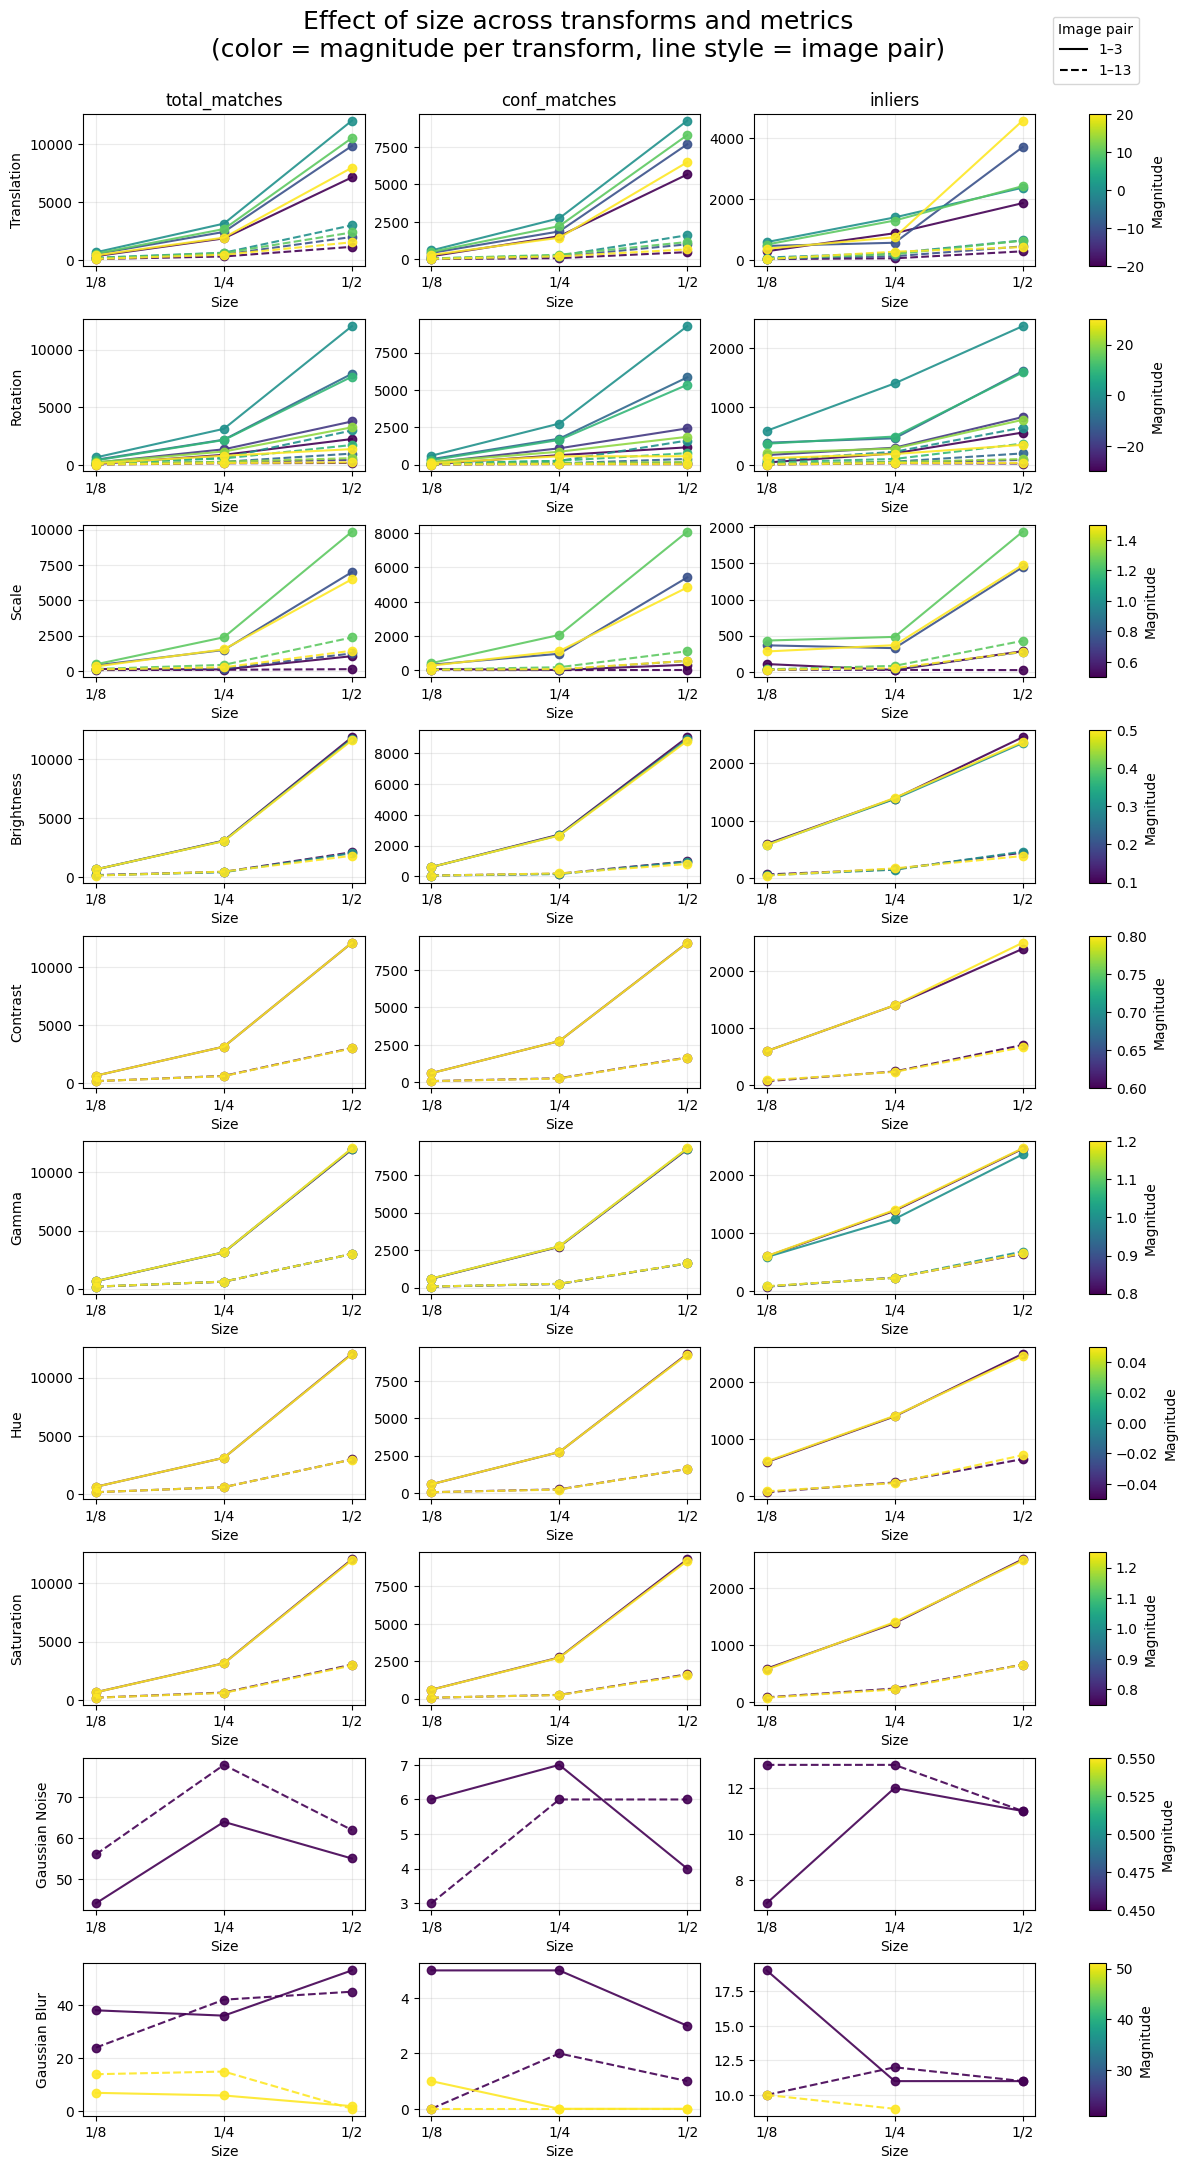

In [ ]:
# BACKGROUND = "Eroded"
# METRICS = ["total_matches", "conf_matches", "inliers"]
# SIZE_ORDER = ["1/2", "1/4", "1/8"]

size_order = ["1/8", "1/4", "1/2"]   # adapt if needed

df = df_full[
    (df_full["background"] == BACKGROUND) #& (df["transform"] != "Gaussian Noise")
].copy()

df = df.copy()  # avoid SettingWithCopyWarning

df["size"] = pd.Categorical(
    df["size"],
    categories=size_order,
    ordered=True
)

df = df.sort_values("size")

plot_size_vs_metric_by_magnitude_and_pair(df, metrics_cat1)

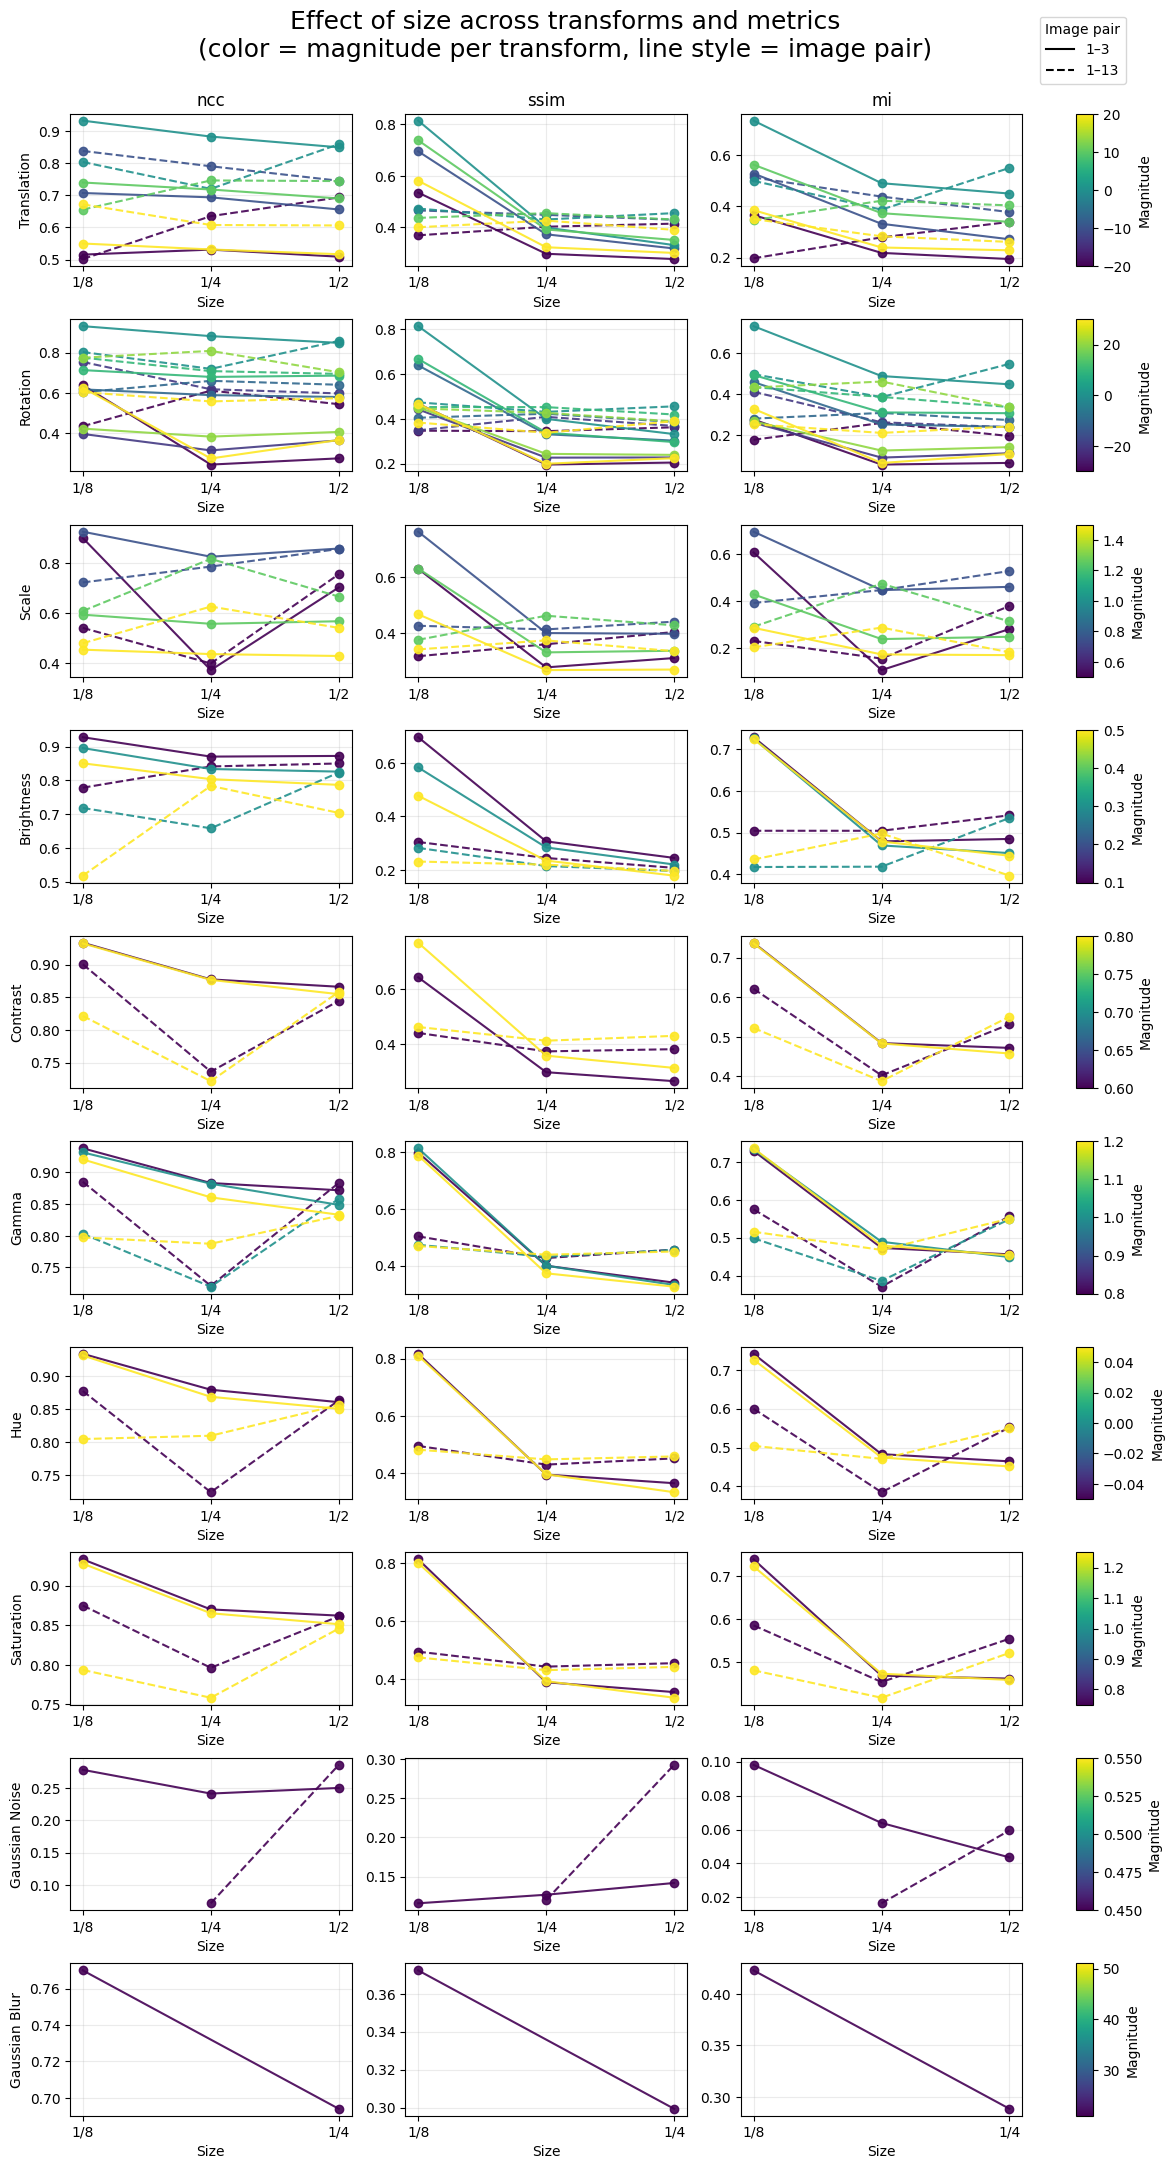

In [59]:
plot_size_vs_metric_by_magnitude_and_pair(df, metrics_cat2)

## Eroded vs Eroded+Cropped Background

In [15]:
df_eroded = df_full[df_full["background"] == "Eroded"]
df_eroded_cropped = df_full[df_full["background"] == "Eroded+Cropped"]

# Columns that define a unique experiment
merge_cols = ["transform", "magnitude", "fixed_image", "moving_image", "size"]

# Merge the two backgrounds
df_merged = pd.merge(
    df_eroded_cropped,
    df_eroded,
    on=merge_cols,
    suffixes=("_crop", "_erode"),
    how="inner"  # keep only experiments that exist in both
)

# Compute the difference for each metric
metrics = ["total_matches", "conf_matches", "inliers", "mse", "ssim", "ncc", "mi"]
for m in metrics:
    df_merged[f"{m}_diff"] = df_merged[f"{m}_crop"] - df_merged[f"{m}_erode"]

# df_merged now contains all Δ metrics
df_merged.head()

fixed_image  moving_image background_crop size transform  magnitude  \
0            1            13  Eroded+Cropped  1/4  Rotation      -30.0   
1            1            13  Eroded+Cropped  1/4  Rotation      -20.0   
2            1            13  Eroded+Cropped  1/4  Rotation      -10.0   
3            1            13  Eroded+Cropped  1/4  Rotation        0.0   
4            1            13  Eroded+Cropped  1/4  Rotation       10.0   

   total_matches_crop  conf_matches_crop  inliers_crop  mse_crop  ...  \
0                 147                 40          33.0  0.030061  ...   
1                 255                 85          46.0  0.024876  ...   
2                 276                 87          61.0  0.022520  ...   
3                 620                251         230.0  0.019546  ...   
4                 566                255         107.0  0.019978  ...   

   ssim_erode  ncc_erode  mi_erode total_matches_diff  conf_matches_diff  \
0    0.894674   0.606517  0.112704                  1                 24   
1    0.932398   0.939886  0.262729                -19                 15   
2    0.930690   0.925629  0.250247               -209                -80   
3    0.926353   0.899308  0.246272                 25                 14   
4    0.932276   0.924509  0.255651                 -3                 15   

   inliers_diff  mse_diff  ssim_diff  ncc_diff   mi_diff  
0          15.0  0.022395  -0.550002  0.005175  0.147695  
1          -9.0  0.023242  -0.523842 -0.321405  0.000885  
2         -25.0  0.020628  -0.508371 -0.265412  0.058997  
3          -2.0  0.016906  -0.495542 -0.179685  0.140083  
4         -20.0  0.018124  -0.480268 -0.216007  0.131763  

[5 rows x 28 columns]

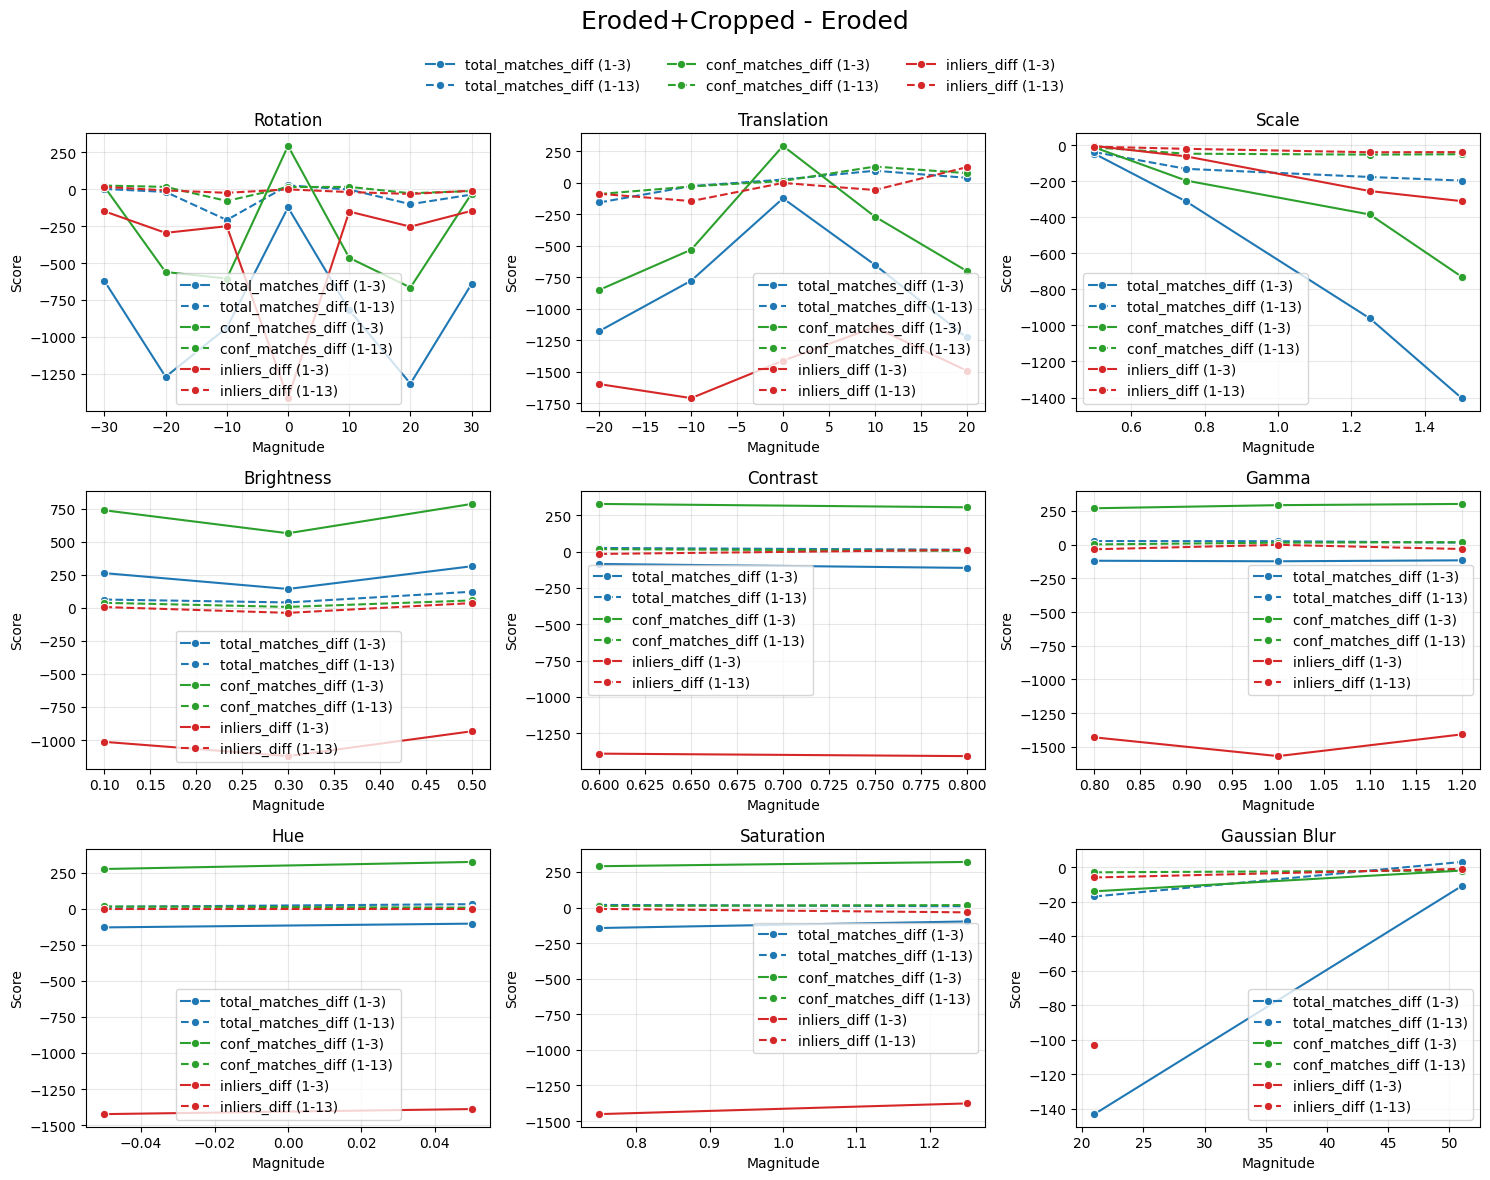

In [20]:
# Filter to size = "1/8"
df = df_merged[(df_merged["size"] == "1/4") & (df_merged["transform"] != "Gaussian Noise")]

# Metrics you want to plot in each subplot
metrics = ["total_matches_diff", "conf_matches_diff", "inliers_diff"]

# Consistent colors for metrics
palette = {
    "total_matches_diff": "#1f77b4",  # blue
    "conf_matches_diff": "#2ca02c",   # green
    "inliers_diff": "#d62728",        # red
}

# Line styles for the two image pairs
pair_styles = {
    (1, 3): "-",
    (1, 13): "--",
}

transforms = df["transform"].unique()
n = len(transforms)

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharey=False)
axes = axes.flatten()

for ax, t in zip(axes, transforms):

    sub = df[df["transform"] == t]

    # Plot curves for each metric & image pair
    for metric in metrics:
        for (f, m), ls in pair_styles.items():

            pair_df = sub[
                (sub["fixed_image"] == f) &
                (sub["moving_image"] == m)
            ].sort_values("magnitude")

            if len(pair_df) > 0:
                sns.lineplot(
                    data=pair_df,
                    x="magnitude",
                    y=metric,
                    label=f"{metric} ({f}-{m})",
                    ax=ax,
                    marker="o",
                    linestyle=ls,
                    color=palette[metric]
                )

    ax.set_title(t)
    ax.set_xlabel("Magnitude")
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.3)

# Hide unused axes
for ax in axes[len(transforms):]:
    ax.set_visible(False)

# Build a combined legend with unique entries
handles, labels = [], []
for ax in axes[:len(transforms)]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate legend entries
uniq = dict(zip(labels, handles))

fig.suptitle("Eroded+Cropped - Eroded", fontsize=18)
fig.legend(
    uniq.values(),
    uniq.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=3,
    frameon=False,
)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

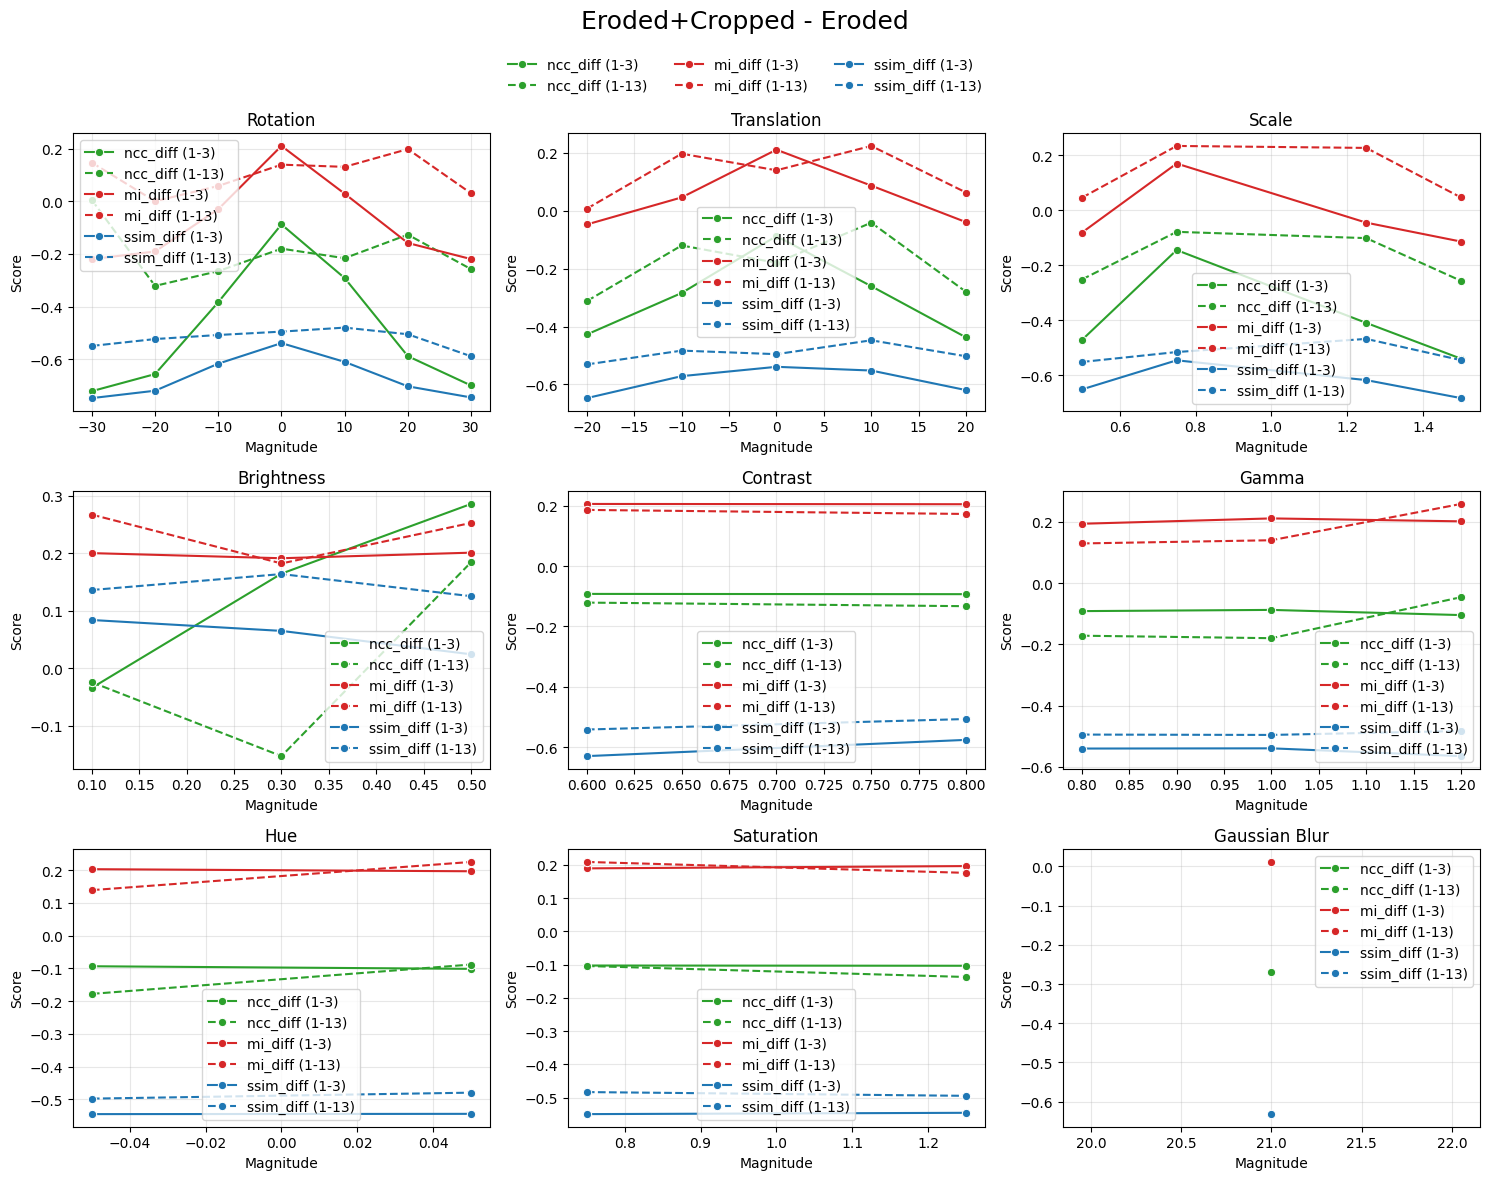

In [22]:
# Filter to size = "1/8"
df = df_merged[(df_merged["size"] == "1/4") & (df_merged["transform"] != "Gaussian Noise")]

# Metrics you want to plot in each subplot
metrics = ["ncc_diff", "mi_diff", "ssim_diff"]

# Consistent colors for metrics
palette = {
    "ssim_diff": "#1f77b4",  # blue
    "ncc_diff": "#2ca02c",   # green
    "mi_diff": "#d62728",        # red
    "mse_diff": "#800080",
}

# Line styles for the two image pairs
pair_styles = {
    (1, 3): "-",
    (1, 13): "--",
}

transforms = df["transform"].unique()
n = len(transforms)

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharey=False)
axes = axes.flatten()

for ax, t in zip(axes, transforms):

    sub = df[df["transform"] == t]

    # Plot curves for each metric & image pair
    for metric in metrics:
        for (f, m), ls in pair_styles.items():

            pair_df = sub[
                (sub["fixed_image"] == f) &
                (sub["moving_image"] == m)
            ].sort_values("magnitude")

            if len(pair_df) > 0:
                sns.lineplot(
                    data=pair_df,
                    x="magnitude",
                    y=metric,
                    label=f"{metric} ({f}-{m})",
                    ax=ax,
                    marker="o",
                    linestyle=ls,
                    color=palette[metric]
                )

    ax.set_title(t)
    ax.set_xlabel("Magnitude")
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.3)

# Hide unused axes
for ax in axes[len(transforms):]:
    ax.set_visible(False)

# Build a combined legend with unique entries
handles, labels = [], []
for ax in axes[:len(transforms)]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate legend entries
uniq = dict(zip(labels, handles))

fig.suptitle("Eroded+Cropped - Eroded", fontsize=18)
fig.legend(
    uniq.values(),
    uniq.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=3,
    frameon=False,
)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## Tables

In [9]:
df_original_image = df_full[(df_full["transform"] == "original image")].sort_values('moving_image')
df_original_image.head()

fixed_image  moving_image size       transform  magnitude  total_matches  \
0             1             3  1/4  original image        NaN           9330   
64            1            13  1/4  original image        NaN           5935   

    conf_matches  inliers  
0           5431     1757  
64          2904      945

In [29]:
df_eroded_image = df_full[(df_full["transform"] == "Rotation") & (df_full["magnitude"]==0)].sort_values(['moving_image', 'background', 'size'])
df_eroded_image

fixed_image  moving_image      background size transform  magnitude  \
131            1             3          Eroded  1/4  Rotation        0.0   
162            1             3          Eroded  1/8  Rotation        0.0   
286            1             3  Eroded+Cropped  1/2  Rotation        0.0   
193            1             3  Eroded+Cropped  1/4  Rotation        0.0   
224            1             3  Eroded+Cropped  1/8  Rotation        0.0   
5              1            13          Eroded  1/4  Rotation        0.0   
36             1            13          Eroded  1/8  Rotation        0.0   
255            1            13  Eroded+Cropped  1/2  Rotation        0.0   
67             1            13  Eroded+Cropped  1/4  Rotation        0.0   
98             1            13  Eroded+Cropped  1/8  Rotation        0.0   

     total_matches  conf_matches  inliers       mse      ssim       ncc  \
131           3261          2456   2814.0  0.000523  0.938816  0.969401   
162            996           726    494.0  0.000441  0.952344  0.973704   
286          12038          9262   2379.0  0.006198  0.331641  0.848669   
193           3137          2748   1400.0  0.004607  0.399540  0.882043   
224            657           596    589.0  0.002626  0.813273  0.931498   
5              595           237    232.0  0.002640  0.926353  0.899308   
36             301           124    162.0  0.002264  0.928430  0.913222   
255           2991          1613    644.0  0.013518  0.455432  0.858225   
67             620           251    230.0  0.019546  0.430812  0.719622   
98             186            69     81.0  0.014394  0.473150  0.803043   

           mi  
131  0.277892  
162  0.288473  
286  0.448898  
193  0.489257  
224  0.732669  
5    0.246272  
36   0.256990  
255  0.548839  
67   0.386355  
98   0.498452